In [3]:
# 必要ライブラリのインポート
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate

## STEP1 データの可視化

In [4]:
# 座標データから画像を生成する関数
def write_dot(path,width,height):
    img = np.zeros((width,height),np.uint8)
    with open(path, 'r') as f:
        dots =f.read().split('\n')
    for dot in dots:
        if dot == '':
            continue
        
        x,y = list(map(int, dot.split(',')))
        img[y][x] = 255
        
    return img

In [5]:
img = write_dot(path='So1.txt', width=300, height=300)

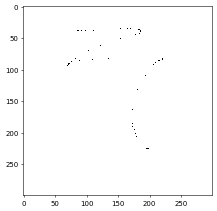

In [9]:
#可視化
plt.figure(figsize=(5,5), dpi=50)
plt.imshow(img,cmap='binary') 
plt.show()

#### 現状では疎な点の集まりであるため、保管してあげる必要がある

## STEP2 スプライン補完

In [10]:
# スプライン補完の関数
def spline(x,y,point,deg):
    tck,u = interpolate.splprep([x,y],k=deg,s=0) 
    u = np.linspace(0,1,num=point,endpoint=True) 
    spline = interpolate.splev(u,tck)
    return spline[0],spline[1]

In [11]:
#座標データからスプライン補完して画像を生成する関数
def write_dot2(path,width,height):
    img = np.zeros((width,height),np.uint8)
    with open(path, 'r') as f:
        dots =f.read().split('\n')
    X,Y = [],[]
    for dot in dots:
        if dot == '':
            continue  
        x,y = list(map(int, dot.split(',')))
        X.append(x)
        Y.append(y)
    X,Y = spline(X,Y,1000,2)
    for x,y in zip(X,Y):
        img[int(round(y))][int(round(x))] = 255
    return X,Y,img

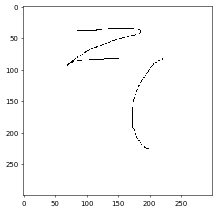

In [12]:
#可視化
#後ほど座標データも使うため、取得している
X,Y, img2 = write_dot2(path='So1.txt', width=300, height=300)
plt.figure(figsize=(5,5), dpi=50)
plt.imshow(img2,cmap='binary') 
plt.show()

#### この離散的な点をフーリエ級数展開する事によって三角関数の式にする

## STEP3 媒介変数表示

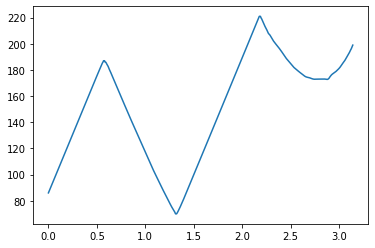

In [14]:
# Xの媒介変数表示
#周期Tの関数とする
t = np.linspace(0, np.pi, len(X))
plt.plot(t,X)

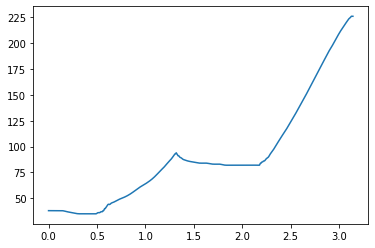

In [15]:
# Yの媒介変数表示
plt.plot(t,Y)

## STEP4 フーリエ級数展開

In [17]:
# フーリエ級数展開する関数
def fourier(i_data, t_data):
    kaisu = 50 # フーリエ級数展開の回数
    T = 2*np.pi
    dt = 1/kaisu
    point = len(i_data)
    t = np.arange(0,dt*point,dt)
    
    def cos(t, n):
        return np.cos(n * 2 * np.pi / T * t)  # cos(n * ωt)
    def sin(t, n):
        return np.sin(n * 2 * np.pi / T * t)

    i_gu = i_ki = 0
    for n in range(1, kaisu + 1):
        i_cos = i_data * cos(t_data, n)
        an = (2 / T) * i_cos.sum() * dt
        i_gu += an * cos(t, n)

        i_sin = i_data * sin(t_data, n)
        bn = (2 / T) * i_sin.sum() * dt
        i_ki += bn * sin(t, n)
    return [i_gu, i_ki]

i = fourier(X, t)[0]
j = fourier(Y, t)[0]

In [18]:
# 正規化
j -= min(j)
j /= max(j)
i -= min(i)
i /= max(i)

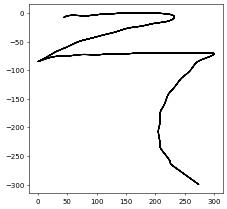

In [19]:
# 可視化
fig = plt.figure(figsize=(5,5), dpi=50)
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(i*300,-j*300,'k') #マイナスはグラフプロットの都合上ついている
fig.savefig('Output.png', bbox_inches='tight', pad_inches=0)

#### 同様の手順で違う座標もフーリエ級数展開する

In [29]:
X2,Y2,_ = write_dot2(path='So2.txt', width=300, height=300)
t2 = np.linspace(0, np.pi, len(X))
i2 = fourier(X2, t2)[0]
j2 = fourier(Y2, t2)[0]

In [30]:
j2 -= min(j2)
j2 /= max(j2)
i2 -= min(i2)
i2 /= max(i2)

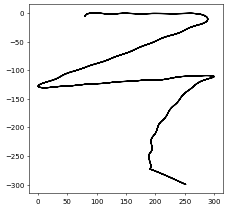

In [32]:
fig = plt.figure(figsize=(5,5), dpi=50)
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(i2*300,-j2*300,'k')
fig.savefig('Output.png', bbox_inches='tight', pad_inches=0)

## STEP5 文字の平均化

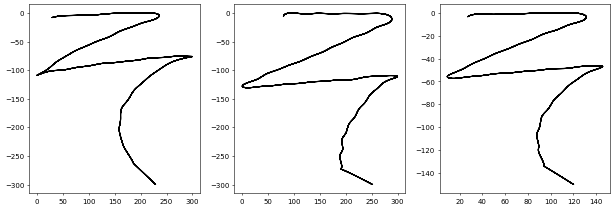

In [71]:
fig4 = plt.figure(figsize=(15,5), dpi=50)
ax1 = fig4.add_subplot(1, 3, 1)
ax2 = fig4.add_subplot(1, 3, 2)
ax3 = fig4.add_subplot(1, 3, 3)
ax1.plot(i*300,-j*300,'k')
ax2.plot(i2*300,-j2*300,'k')
ax3.plot(i3*300,-j3*300,'k')